In [2]:
import openai
import os
import importlib.util
import sys
from os import walk
import json
import pandas as pd

pd.set_option( "display.width", 512)
pd.set_option( "display.max_columns", 6 )
# import sys
# import datetime as dt

In [3]:
import datetime as dt
import os

# from lib import util as du


class Stopwatch:

    def __init__( self ):

        self.start_time = dt.datetime.now()

    def print( self, msg=None, prepend_nl=False, end="\n\n", use_millis=False ):

        """
        Prints time elapsed since instantiation

        If more than 1 minute has passed it uses "mm:ss" format.  Otherwise, it just prints seconds

        ¡OJO!/NOTE: This is fairly simpleminded, it's probably more accurate to use timeit

        :param msg: Text to the output before elapsed time is reported

        :param prepend_nl: Insert a new line before printing to the console, defaults to False

        :param end: Optional text to append to the end of the output, similar to how print works in the standard library.  Defaults to two carriage turns

        :param use_millis: Dump elapsed time in milliseconds to the console. Faults to False

        :return: None, Prince to console only
        """

        seconds = (dt.datetime.now() - self.start_time).seconds

        # check msg argument
        if msg is None: msg = "Finished"

        # preformat output
        if prepend_nl: print()

        if use_millis:

            # From: https://stackoverflow.com/questions/766335/python-speed-testing-time-difference-milliseconds
            delta = dt.datetime.now() - self.start_time
            millis = int( delta.total_seconds() * 1000 )

            print( "{0} in {1:,} ms".format( msg, millis ), end=end )

        elif seconds > 59:

            # From: https://stackoverflow.com/questions/775049/how-do-i-convert-seconds-to-hours-minutes-and-seconds
            minutes, seconds = divmod( seconds, 60 )
            print( "{0} in {1:02d}:{2:02d}".format( msg, minutes, seconds ), end=end )

        else:
            print( "{0} in {1:,} seconds".format( msg, seconds ), end=end )

    def get_delta( self ):

        """
        Calculate the delta between now and when this object was instantiated

        :return: Time delta in milliseconds
        """

        delta = dt.datetime.now() - self.start_time
        millis = int( delta.total_seconds() * 1000 )

        return millis


In [4]:
timer = Stopwatch()
timer.print( "Finished doing foo", use_millis=True )

Finished doing foo in 0 ms



In [5]:
# From: https://stackoverflow.com/questions/67631/how-can-i-import-a-module-dynamically-given-the-full-path

def import_module( path ):

    print( " loading {}... ".format( path ) )
    spec = importlib.util.spec_from_file_location( "module.name", path )
    mod = importlib.util.module_from_spec( spec )
    sys.modules[ "module.name" ] = mod
    spec.loader.exec_module( mod )

    return mod
# du =
lib_path = "/var/genie-in-the-box/src/lib"

du = import_module( lib_path + "/util.py" )

du.print_banner( "foo" )


 loading /var/genie-in-the-box/src/lib/util.py... 
------------------------------------------------------------------------------------------------------------------------
- foo
------------------------------------------------------------------------------------------------------------------------



In [6]:
! ls -alh /var/genie-in-the-box/src/lib/util_stopwatch.py

-rw-rw-r-- 1 1000 1000 2.7K Jun 19 17:08 /var/genie-in-the-box/src/lib/util_stopwatch.py


In [8]:
def import_sw( path ):

    print( " loading {}... ".format( path ) )
    spec = importlib.util.spec_from_file_location( "module.name", path )
    mod = importlib.util.module_from_spec( spec )
    sys.modules[ "module.name" ] = mod
    spec.loader.exec_module( mod )

    return mod

sw = import_sw( lib_path + "/util_stopwatch.py" )
sw


 loading /var/genie-in-the-box/src/lib/util_stopwatch.py... 


ModuleNotFoundError: No module named 'lib'

In [6]:
# sw = import_sw( lib_path + "/util_stopwatch.py" )
bar = import_sw( lib_path + "/util.py" )
bar.print_banner( "foo" )

NameError: name 'import_sw' is not defined

In [11]:
sys.path.append( "/var/genie-in-the-box/src/lib" )

In [5]:
du = importlib.import_module( "util" )
du.print_banner( "foo" )

ModuleNotFoundError: No module named 'util'

In [16]:
timer = Stopwatch()
timer.print( "Finished doing foo", use_millis=True )

Finished doing foo in 0 ms



In [13]:
path = "/var/genie-in-the-box/src/prompts/data"

def get_training_data_paths( path ):

    # From: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
    filenames = next( walk( path ), ( None, None, [ ] ) )[ 2 ]
    paths     = [ ]
    for filename in filenames:

        if filename.startswith( "synthetic-data-" ) and filename.endswith( ".txt" ):
            paths.append( path + "/" + filename )
            print( filename )

    paths.sort()
    return paths

training_data_paths = get_training_data_paths( path )
training_data_paths

synthetic-data-search-google-in-new-tab.txt
synthetic-data-search-in-new-tab.txt
synthetic-data-search-google-scholar-in-new-tab.txt
synthetic-data-search-google-in-current-tab.txt
synthetic-data-load-url-in-current-tab.txt
synthetic-data-load-url-new-tab.txt
synthetic-data-search-in-current-tab.txt
synthetic-data-none-of-the-above.txt
synthetic-data-search-google-scholar-in-current-tab.txt


['/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-new-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-none-of-the-above.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-new-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-scholar-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-scholar-in-new-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-in-current-tab.txt',
 '/var/genie-in-the-box/src/prompts/data/synthetic-data-search-in-new-tab.txt']

In [14]:
def get_training_commands_maps( path ):

    vox_filename_to_completion_text = du.get_file_as_dictionary( path, debug=True, lower_case=True )

    # Now, flip the dictionary so that the completion text is the key and the filename is the value
    vox_completion_text_to_filename = { v: k for k, v in vox_filename_to_completion_text.items() }

    return vox_filename_to_completion_text, vox_completion_text_to_filename

vox_filename_to_completion_text_dict, vox_completion_text_to_filename = get_training_commands_maps(
    path =du.get_project_root() + "/src/prompts/data/training-commands.map"
)

print( vox_filename_to_completion_text_dict )
vox_completion_text_to_filename

{'synthetic-data-search-in-new-tab.txt': 'search new tab', 'synthetic-data-search-in-current-tab.txt': 'search current tab', 'synthetic-data-search-google-in-new-tab.txt': 'search google new tab', 'synthetic-data-search-google-in-current-tab.txt': 'search google current tab', 'synthetic-data-search-google-scholar-in-new-tab.txt': 'search google scholar new tab', 'synthetic-data-search-google-scholar-in-current-tab.txt': 'search google scholar current tab', 'synthetic-data-load-url-new-tab.txt': 'open new tab', 'synthetic-data-load-url-in-current-tab.txt': 'in current tab', 'synthetic-data-none-of-the-above.txt': 'none of the above'}


{'search new tab': 'synthetic-data-search-in-new-tab.txt',
 'search current tab': 'synthetic-data-search-in-current-tab.txt',
 'search google new tab': 'synthetic-data-search-google-in-new-tab.txt',
 'search google current tab': 'synthetic-data-search-google-in-current-tab.txt',
 'search google scholar new tab': 'synthetic-data-search-google-scholar-in-new-tab.txt',
 'search google scholar current tab': 'synthetic-data-search-google-scholar-in-current-tab.txt',
 'open new tab': 'synthetic-data-load-url-new-tab.txt',
 'in current tab': 'synthetic-data-load-url-in-current-tab.txt',
 'none of the above': 'synthetic-data-none-of-the-above.txt'}

In [78]:
def get_vox_commands( command_paths, command_map ):

    vox_command_dfs = {}

    for path in command_paths:

        print( "Loading [{}]...".format( path ) )
        commands = du.get_file_as_list( path, clean=True, lower_case=False )
        print( "Loaded [{}] commands".format( len( commands ) ) )

        # instantiate data frame with commands list
        vox_command_df = pd.DataFrame( commands, columns = [ "prompt" ] )

        # Set default value
        vox_command_df[ "args" ]       = ""

        # Fetch the completion text from the command map
        file_name      = path.split( "/" )[ -1 ]
        print( "file_name [{}]".format( file_name ) )
        vox_command_df[ "completion" ] = command_map[ file_name ]


        # Get the completion text
        completion_text = command_map[ file_name ]
        print( "completion_text [{}]".format( completion_text ) )

        # Check to see if 1st commands text contains DOMAIN_NAME constant
        if "DOMAIN_NAME" in commands[ 0 ]:

            print( "commands [{}] contains DOMAIN_NAME...".format( file_name ) )

            # First, create a copy of the data frame without domain names
            sans_domain_names_df = vox_command_df.copy()

            # Create valid and invalid domain names
            vox_command_df[       "args" ] = du.generate_domain_names( len( commands ) )
            sans_domain_names_df[ "args" ] = du.generate_domain_names( len( commands ), remove_dots=True )

            # Replace domain name constant with domain names, in both data frames
            vox_command_df[       "prompt" ] = vox_command_df.apply(
                lambda row:  row[ "prompt" ].replace( "DOMAIN_NAME", str( row[ "args" ] ) ), axis=1
            )
            sans_domain_names_df[ "prompt" ] = sans_domain_names_df.apply(
                lambda row:  row[ "prompt" ].replace( "DOMAIN_NAME", str( row[ "args" ] ) ), axis=1
            )
            # Clear the ARG's column and set to empty string
            sans_domain_names_df[   "args" ] = "NO_VALID_DOMAIN_NAME"

            # concatenate the two data frames
            vox_command_df = pd.concat( [ vox_command_df, sans_domain_names_df ] )

        # Check to see if commands text contains SEARCH_TERMS constant
        if "SEARCH_TERMS" in commands[ 0 ]:

            print( "commands [{}] contains SEARCH_TERMS...".format( file_name ) )

            # Create a dataframe without search terms
            sans_search_terms_df = vox_command_df.copy()
            sans_search_terms_df[ "args"   ] = "NO_SEARCH_TERMS"
            sans_search_terms_df[ "prompt" ] = sans_search_terms_df.apply( lambda row: row[ "prompt" ].replace( "SEARCH_TERMS", "" ), axis=1 )
            sans_search_terms_df[ "prompt" ] = sans_search_terms_df[ "prompt" ].str.replace( "  ", " " )

            vox_command_df[ "args"   ] = du.get_search_terms( len( commands ) )
            vox_command_df[ "prompt" ] = vox_command_df.apply( lambda row: row[ "prompt" ].replace( "SEARCH_TERMS", str( row[ "args" ] ) ), axis=1 )

            # concatenate the two data frames
            vox_command_df = pd.concat( [ vox_command_df, sans_search_terms_df ] )

        # append freshly minted data frame to the list
        vox_command_dfs[ completion_text ] = vox_command_df

        print()

    return vox_command_dfs

vox_command_dfs = get_vox_commands( training_data_paths, vox_filename_to_completion_text_dict )
# vox_command_dfs[ "in current tab" ]

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-in-current-tab.txt]
completion_text [in current tab]
commands [synthetic-data-load-url-in-current-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-new-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-new-tab.txt]
completion_text [open new tab]
commands [synthetic-data-load-url-new-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-none-of-the-above.txt]...
Loaded [500] commands
file_name [synthetic-data-none-of-the-above.txt]
completion_text [none of the above]

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-search-google-in-current-tab.txt]
completion_text [search google current tab]
commands [synthetic-data-search-

In [79]:
vox_command_dfs[ "search new tab" ].head( 10 )

,prompt,args,completion
0,how to play guitar chords new tab,how to play guitar chords,search new tab
1,"New tab, search why leaves change color",why leaves change color,search new tab
2,"Open new tab, search for how to take care of a...",how to take care of a pet dog/cat/fish,search new tab
3,Pull up new car reviews in a new tab,new car reviews,search new tab
4,Find searching for vegan recipes in a new tab,searching for vegan recipes,search new tab
5,"Hunt for healthy snack ideas, new tab",healthy snack ideas,search new tab
6,Display classic rock music results in new tab,classic rock music,search new tab
7,Do a search for DIY gift ideas and show result...,DIY gift ideas,search new tab
8,Execute SEO strategies search in a new tab,SEO strategies,search new tab
9,Seek what is climate change? in a fresh tab,what is climate change?,search new tab


In [80]:
vox_command_dfs[ "in current tab" ].tail( 10 )

,prompt,args,completion
190,Let's redirect this tab to remarkableicebergcom,NO_VALID_DOMAIN_NAME,in current tab
191,Can we visit testwonderfulapplecom?,NO_VALID_DOMAIN_NAME,in current tab
192,Will you navigate to blogremarkablekangaroocom...,NO_VALID_DOMAIN_NAME,in current tab
193,Let's switch to spectacularxylophoneio in this...,NO_VALID_DOMAIN_NAME,in current tab
194,Could you bring up testspectaculartornadogov?,NO_VALID_DOMAIN_NAME,in current tab
195,Pleas present mailbeautifulstrawberrynet in th...,NO_VALID_DOMAIN_NAME,in current tab
196,Let's check out mailwonderfulbananaio,NO_VALID_DOMAIN_NAME,in current tab
197,Can we view betaamazingwalrusio?,NO_VALID_DOMAIN_NAME,in current tab
198,Will you fetch devjubilantwalrusinfo in this t...,NO_VALID_DOMAIN_NAME,in current tab
199,Let's move to spectaculargiraffeinfo in the stub,NO_VALID_DOMAIN_NAME,in current tab


In [81]:
vox_command_dfs[ "none of the above" ].shape

(500, 3)

In [82]:
# update list of data frames
vox_command_dfs = get_vox_commands( training_data_paths, vox_filename_to_completion_text_dict )

# concatenate data frames
vox_command_df = pd.concat( vox_command_dfs )
vox_command_df.shape

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-in-current-tab.txt]
completion_text [in current tab]
commands [synthetic-data-load-url-in-current-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-load-url-new-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-load-url-new-tab.txt]
completion_text [open new tab]
commands [synthetic-data-load-url-new-tab.txt] contains DOMAIN_NAME...

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-none-of-the-above.txt]...
Loaded [500] commands
file_name [synthetic-data-none-of-the-above.txt]
completion_text [none of the above]

Loading [/var/genie-in-the-box/src/prompts/data/synthetic-data-search-google-in-current-tab.txt]...
Loaded [200] commands
file_name [synthetic-data-search-google-in-current-tab.txt]
completion_text [search google current tab]
commands [synthetic-data-search-

(3700, 3)

## Format completions + prompts

In [83]:
def format_df( df ):
    # Get categorical values.
    df[ "completion_categorical" ] = pd.factorize( df[ "completion" ] )[ 0 ]

    # Rename columns
    df.rename( columns={ "completion": "completion_text", "completion_categorical": "completion" }, inplace=True )

    # Add leading space per instructions
    df[ "completion" ] = " " + df[ "completion" ].astype( str ) + "\n"

    # Insert hash marks and space according to these instructions below
    # https://community.openai.com/t/gpt3-finetuning-for-multilabel-classification/19105/5
    df[ "prompt"     ] = df[ "prompt" ] + "\n\n###\n\n"

    # Display the head
    return  df

formatted_df = format_df( vox_command_df.copy() )
formatted_df.head()


prompt                         args completion_text completion
in current tab 0  Load blog.excitingcherry.net right here in the...      blog.excitingcherry.net  in current tab        0\n
               1  Go straight to mail.incrediblegiraffe.info in ...  mail.incrediblegiraffe.info  in current tab        0\n
               2  Please navigate to test.excitingcherry.gov\n\n...      test.excitingcherry.gov  in current tab        0\n
               3  Get dev.beautifulnovember.net up on the screen...    dev.beautifulnovember.net  in current tab        0\n
               4  Put up prod.hilariousmango.info in the current...     prod.hilariousmango.info  in current tab        0\n

## Create summary

In [84]:
cols = [ "completion", "completion_text" ]
summary_df = formatted_df[ cols ].copy()
summary_df.drop_duplicates( inplace=True )
summary_df.reset_index( drop=True, inplace=True )

print( summary_df[ "completion_text" ] )

# 0                       in current tab
# 1                         open new tab
# 2                    none of the above
# 3            search google current tab
# 4                search google new tab
# 5    search google scholar current tab
# 6        search google scholar new tab
# 7                   search current tab
# 8                       search new tab

0                       in current tab
1                         open new tab
2                    none of the above
3            search google current tab
4                search google new tab
5    search google scholar current tab
6        search google scholar new tab
7                   search current tab
8                       search new tab
Name: completion_text, dtype: object


## Create Data frame for training on domain name extraction.

In [85]:
# Create Data frame for training on domain name extraction.
cols = [ "in current tab", "open new tab" ]
domain_names_df = vox_command_df[ vox_command_df.completion.isin( cols ) ].copy()

#  Assign the ARG's columns values to the completion column.
domain_names_df[ "completion" ] = " " + domain_names_df[ "args" ].astype( str ) + "\n"
domain_names_df[ "completion" ] = domain_names_df[ "completion" ].str.lower()
domain_names_df[ "prompt"     ] = domain_names_df[ "prompt" ] + "\n\n###\n\n"
domain_names_df.tail()



prompt                  args               completion
open new tab 195  Goat to blogincredibleelephantgov in a tubber ...  NO_VALID_DOMAIN_NAME   no_valid_domain_name\n
             196  Launch a sap rate table for fantasticoctopusne...  NO_VALID_DOMAIN_NAME   no_valid_domain_name\n
             197  In a new tubby, head to testremarkabletornadoo...  NO_VALID_DOMAIN_NAME   no_valid_domain_name\n
             198  Can you visit testincredibleunicornio in a new...  NO_VALID_DOMAIN_NAME   no_valid_domain_name\n
             199  Please open a new table and go to wwwmagnifice...  NO_VALID_DOMAIN_NAME   no_valid_domain_name\n

In [86]:
json_path = "/var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-domain-names-batch-01.jsonl"
domain_names_df[ [ "prompt", "completion" ] ].to_json( json_path, orient='records', lines=True )

In [44]:
! openai tools fine_tunes.prepare_data -f /var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-domain-names-batch-01.jsonl -q

Analyzing...

- Your file contains 800 prompt-completion pairs
- All prompts end with suffix `\n\n###\n\n`
- All completions end with suffix `\n`

No remediations found.

You can use your file for fine-tuning:
> openai api fine_tunes.create -t "/var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-domain-names-batch-01.jsonl"

After you’ve fine-tuned a model, remember that your prompt has to end with the indicator string `\n\n###\n\n` for the model to start generating completions, rather than continuing with the prompt. Make sure to include `stop=["\n"]` so that the generated texts ends at the expected place.
Once your model starts training, it'll approximately take 13.43 minutes to train a `curie` model, and less for `ada` and `babbage`. Queue will approximately take half an hour per job ahead of you.


In [45]:
! openai api fine_tunes.create -t "/var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-domain-names-batch-01.jsonl" -m ada --suffix "domain-names"

Upload progress: 100%|█████████████████████| 91.0k/91.0k [00:00<00:00, 203Mit/s]
Uploaded file from /var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-domain-names-batch-01.jsonl: file-xHq2k5aNDECWuwvjJfXhHA8d
Created fine-tune: ft-iKq7bddoFU9cPhh4Idlke9J7
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-07-12 14:33:40] Created fine-tune: ft-iKq7bddoFU9cPhh4Idlke9J7

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-iKq7bddoFU9cPhh4Idlke9J7



In [109]:
! openai api fine_tunes.follow -i ft-iKq7bddoFU9cPhh4Idlke9J7

[2023-07-12 14:33:40] Created fine-tune: ft-iKq7bddoFU9cPhh4Idlke9J7
[2023-07-12 16:35:51] Fine-tune costs $0.03
[2023-07-12 16:35:51] Fine-tune enqueued. Queue number: 17
[2023-07-12 16:36:05] Fine-tune is in the queue. Queue number: 16
[2023-07-12 16:37:21] Fine-tune is in the queue. Queue number: 15
[2023-07-12 16:38:48] Fine-tune is in the queue. Queue number: 14
[2023-07-12 16:39:26] Fine-tune is in the queue. Queue number: 13
[2023-07-12 16:40:24] Fine-tune is in the queue. Queue number: 12
[2023-07-12 16:41:19] Fine-tune is in the queue. Queue number: 11
[2023-07-12 16:42:33] Fine-tune is in the queue. Queue number: 10
[2023-07-12 16:43:43] Fine-tune is in the queue. Queue number: 9
[2023-07-12 16:49:02] Fine-tune is in the queue. Queue number: 8
[2023-07-12 16:52:13] Fine-tune is in the queue. Queue number: 7
[2023-07-12 16:54:45] Fine-tune is in the queue. Queue number: 6
[2023-07-12 16:59:24] Fine-tune is in the queue. Queue number: 5
[2023-07-12 17:01:04] Fine-tune is in the

## Argument Extraction: search terms

In [87]:
vox_command_df.completion.value_counts()

none of the above                    500
in current tab                       400
open new tab                         400
search google current tab            400
search google new tab                400
search google scholar current tab    400
search google scholar new tab        400
search current tab                   400
search new tab                       400
Name: completion, dtype: int64

### Filter out non-search related records.

In [94]:
# Filter out non-search related records.
cols = [ "in current tab", "open new tab" ]
search_terms_df = vox_command_df[ ~vox_command_df.completion.isin( cols ) ].copy()

# Filter out non-search related prompts.
search_terms_df = search_terms_df[ search_terms_df.completion.str.startswith( "search" ) ]

print( search_terms_df.completion.value_counts() )

# #  Assign the ARG's columns values to the completion column.
search_terms_df[ "completion" ] = " " + search_terms_df[ "args" ].astype( str ) + "\n"
search_terms_df[ "completion" ] = search_terms_df[ "completion" ].str.lower()
search_terms_df[ "prompt"     ] = search_terms_df[ "prompt" ] + "\n\n###\n\n"
# search_terms_df.shape
# print( search_terms_df.head() )
search_terms_df.tail()

search google current tab            400
search google new tab                400
search google scholar current tab    400
search google scholar new tab        400
search current tab                   400
search new tab                       400
Name: completion, dtype: int64


prompt             args          completion
search new tab 195  Grew a hertz and dis play the rustling in a kn...  NO_SEARCH_TERMS   no_search_terms\n
               196  Stow a hertz and display the results in a newt...  NO_SEARCH_TERMS   no_search_terms\n
               197  Flow a merch and dismay the rustling in a gnu ...  NO_SEARCH_TERMS   no_search_terms\n
               198  Chew a hertz and dis play the rustling in a ne...  NO_SEARCH_TERMS   no_search_terms\n
               199  Stow a lurch and display the results in a knew...  NO_SEARCH_TERMS   no_search_terms\n

In [98]:
json_path = "/var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-search-terms-batch-01.jsonl"
# Drop duplicates
# search_terms_df[ [ "prompt", "completion" ] ].drop_duplicates()
search_terms_df[ [ "prompt", "completion" ] ].drop_duplicates().to_json( json_path, orient='records', lines=True )

In [100]:
! openai tools fine_tunes.prepare_data -f /var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-search-terms-batch-01.jsonl

Analyzing...

- Your file contains 2353 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- All prompts end with suffix `\n\n###\n\n`

No remediations found.
- [Recommended] Would you like to split into training and validation set? [Y/n]: ^C



In [101]:
! openai api fine_tunes.create -t "/var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-search-terms-batch-01.jsonl" -m ada --suffix "search-terms"


Upload progress: 100%|███████████████████████| 252k/252k [00:00<00:00, 548Mit/s]
Uploaded file from /var/genie-in-the-box/src/prompts/data/jsonl/args-extraction-search-terms-batch-01.jsonl: file-SEF7jmXKt6BZvcngFz04gUC5
Created fine-tune: ft-z2qdA4ad8pPgUu9810nfi0lJ
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-07-12 16:12:52] Created fine-tune: ft-z2qdA4ad8pPgUu9810nfi0lJ

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-z2qdA4ad8pPgUu9810nfi0lJ



In [112]:
! openai api fine_tunes.follow -i ft-z2qdA4ad8pPgUu9810nfi0lJ

[2023-07-12 16:12:52] Created fine-tune: ft-z2qdA4ad8pPgUu9810nfi0lJ
[2023-07-12 18:02:07] Fine-tune costs $0.07
[2023-07-12 18:02:07] Fine-tune enqueued. Queue number: 27
[2023-07-12 18:02:19] Fine-tune is in the queue. Queue number: 26
[2023-07-12 18:02:34] Fine-tune is in the queue. Queue number: 25
[2023-07-12 18:03:08] Fine-tune is in the queue. Queue number: 24
[2023-07-12 18:03:33] Fine-tune is in the queue. Queue number: 23
[2023-07-12 18:03:53] Fine-tune is in the queue. Queue number: 22
[2023-07-12 18:04:37] Fine-tune is in the queue. Queue number: 21
[2023-07-12 18:05:18] Fine-tune is in the queue. Queue number: 20
[2023-07-12 18:07:27] Fine-tune is in the queue. Queue number: 19
[2023-07-12 18:08:01] Fine-tune is in the queue. Queue number: 18
[2023-07-12 18:18:47] Fine-tune is in the queue. Queue number: 17
[2023-07-12 18:19:21] Fine-tune is in the queue. Queue number: 16
[2023-07-12 18:22:05] Fine-tune is in the queue. Queue number: 15
[2023-07-12 18:22:37] Fine-tune is i

In [114]:
! openai api completions.create -m ada:ft-deepily:search-terms-2023-07-12-19-27-22 -p "search for best chinese restaurants near me in another tab\n\n###\n\n"

search for best chinese restaurants near me in another tab\n\n###\n\n

 best chinese restaurants near me

###

 best chinese restaurants


# Voice Commands Classification

In [21]:
json_path = "/var/genie-in-the-box/src/prompts/data/jsonl/vox-command-batch-01.jsonl"
formatted_df[ [ "prompt", "completion" ] ].to_json( json_path, orient='records', lines=True )


In [25]:
! openai tools fine_tunes.prepare_data -f /var/genie-in-the-box/src/prompts/data/jsonl/vox-command-batch-02.jsonl -q

Analyzing...

- Your file contains 2100 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 34 duplicated prompt-completion sets. These are rows: [514, 515, 535, 555, 558, 561, 562, 567, 570, 571, 572, 576, 577, 578, 579, 581, 584, 586, 588, 589, 590, 594, 597, 599, 602, 615, 626, 630, 632, 656, 676, 682, 683, 690]
- All prompts end with suffix `\n\n###\n\n`

Based on the analysis we will perform the following actions:
- [Recommended] Remove 34 duplicate rows [Y/n]: Y
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `/var/genie-in-the-box/src/prompts/data/jsonl/vox-com

In [26]:
! openai api fine_tunes.create -t "/var/genie-in-the-box/src/prompts/data/jsonl/vox-command-batch-02_prepared_train.jsonl" -v "/var/genie-in-the-box/src/prompts/data/jsonl/vox-command-batch-02_prepared_valid.jsonl" --compute_classification_metrics --classification_n_classes 9 -m ada --suffix "vox-commands"

Upload progress: 100%|██████████████████████| 147k/147k [00:00<00:00, 61.6Mit/s]
Uploaded file from /var/genie-in-the-box/src/prompts/data/jsonl/vox-command-batch-02_prepared_train.jsonl: file-146CMJBNZ0jf88t9pQl3wWfA
Upload progress: 100%|████████████████████| 36.9k/36.9k [00:00<00:00, 28.4Mit/s]
Uploaded file from /var/genie-in-the-box/src/prompts/data/jsonl/vox-command-batch-02_prepared_valid.jsonl: file-L3ydTmqryeJgqfizZeP2cjpX
Created fine-tune: ft-q3bAuHD3G528dgDAvIbe1RTt
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-07-11 19:07:40] Created fine-tune: ft-q3bAuHD3G528dgDAvIbe1RTt

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-q3bAuHD3G528dgDAvIbe1RTt



In [64]:
!openai api fine_tunes.follow -i ft-q3bAuHD3G528dgDAvIbe1RTt

[2023-07-11 19:07:40] Created fine-tune: ft-q3bAuHD3G528dgDAvIbe1RTt
[2023-07-11 22:35:27] Fine-tune costs $0.04
[2023-07-11 22:35:27] Fine-tune enqueued. Queue number: 23
[2023-07-11 22:36:21] Fine-tune is in the queue. Queue number: 22
[2023-07-11 22:36:55] Fine-tune is in the queue. Queue number: 21
[2023-07-11 22:37:39] Fine-tune is in the queue. Queue number: 20
[2023-07-11 22:38:53] Fine-tune is in the queue. Queue number: 19
[2023-07-11 22:39:48] Fine-tune is in the queue. Queue number: 18
[2023-07-11 22:41:24] Fine-tune is in the queue. Queue number: 17
[2023-07-11 22:41:39] Fine-tune is in the queue. Queue number: 16
[2023-07-11 22:42:08] Fine-tune is in the queue. Queue number: 15
[2023-07-11 22:44:13] Fine-tune is in the queue. Queue number: 14
[2023-07-11 22:45:18] Fine-tune is in the queue. Queue number: 13
[2023-07-11 22:47:09] Fine-tune is in the queue. Queue number: 12
[2023-07-11 22:48:17] Fine-tune is in the queue. Queue number: 11
[2023-07-11 22:57:07] Fine-tune is i

In [65]:
! openai api completions.create -m ada:ft-deepily-2023-07-12-00-02-27 -p "computer, take me to foo.bar.org\n\n###\n\n"

computer, take me to foo.bar.org\n\n###\n\n 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [32]:
du.get_project_root()

'/var/genie-in-the-box'

In [33]:
!openai api fine_tunes.results -i ft-wc5GJU9sIlyhrtw9kf3SRg0E > /var/genie-in-the-box/src/prompts/data/fine-tuning-results/ft-deepily-2023-07-10-23-39-03.csv

In [34]:
import pandas as pd

In [35]:
results = pd.read_csv( "/var/genie-in-the-box/src/prompts/data/fine-tuning-results/ft-deepily-2023-07-10-23-39-03.csv" )
results[ results[ "classification/accuracy" ].notnull() ].tail( 1 )

,step,elapsed_tokens,elapsed_examples,...,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
2561,2562,117812,5124,...,NaN,0.996875,0.99687


<AxesSubplot:>

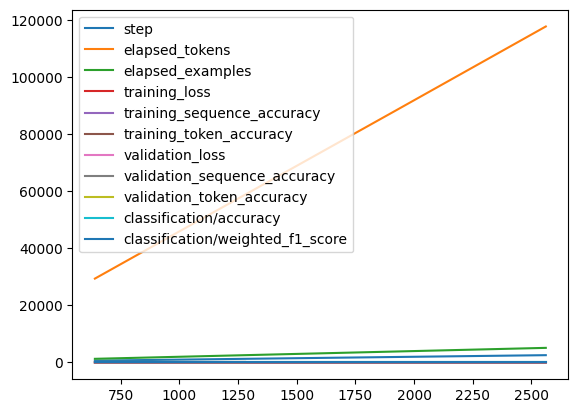

In [36]:
results[ results[ "classification/accuracy" ].notnull() ].plot()

In [37]:
results[ results[ "classification/accuracy" ].notnull() ].plot( x="iteration", y="classification/accuracy" )

KeyError: 'iteration'

In [38]:
vox_command_df.head()

prompt      completion                         args
in current tab 0  Load stage.excitingmango.info right here in th...  in current tab     stage.excitingmango.info
               1  Go straight to login.beautifulapple.gov in thi...  in current tab     login.beautifulapple.gov
               2     Please navigate to stage.incredibledolphin.gov  in current tab  stage.incredibledolphin.gov
               3  Get beta.excitingbanana.com up on the screen i...  in current tab      beta.excitingbanana.com
               4   Put up spectacularpenguin.net in the current tab  in current tab       spectacularpenguin.net